# 11. Word2Vec
- 적당하게 데이터를 나열해주면 Word2vec은 위치가 근접한 데이터를 유사도가 높은 벡터를 만들어준다는 점에서 착안된 아이디어
- Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 하며, 아래 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줌
- Word2Vec는 입력층과 출력층 사이에 하나의 은닉층만이 존재
- Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부름
-  Word2Vec의 출력층에서는 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트
- 만약 단어 집합의 크기가 수만 이상에 달한다면 이 작업은 굉장히 무거운 작업이므로, Word2Vec은 꽤나 학습하기에 무거운 모델

## 11.1 CBoW (Continuous Bag of Words)

- Word2Vec에는 CBoW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식
- CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
    - 예측 해야하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)
    - 중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지를 결정 했다면 이 범위를 윈도우(window)라고 함

![cbow](img/cbow.png)

![cbow_model](img/cbow_model.png)

## 11.2 Skip-gram
- Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법
- 중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정은 없음
- 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려짐
![skipgram](img/skipgram.png)
![skipgram_model](img/skipgram_model.png)

## 11.3 NNLM vs CBOW
- NNLM은 단어 간 유사도를 구할 수 있도록 워드 임베딩의 개념을 도입
- NNLM의 느린 학습 속도와 정확도를 개선하여 탄생한 것이 Word2Vec
- NNLM은 언어 모델이므로 다음 단어를 예측하지만, Word2Vec(CBOW)은 워드 임베딩 자체가 목적이므로 다음 단어가 아닌 중심 단어를 예측하며 학습
- 중심 단어를 예측하게 하므로서 NNLM이 예측 단어의 이전 단어들만을 참고하였던 것과는 달리, Word2Vec은 예측 단어의 전, 후 단어들을 모두 참고

![nnlm_vs_cbow](img/nnlm_vs_cbow.png)

## 11.4 Word2Vec - 영어


In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Black\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1ed2db3d2e0>)

In [4]:
# 훈련 데이터 전처리하기
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]
print('총 샘플의 개수 : {}'.format(len(result)))


총 샘플의 개수 : 273424


## 11.4.1 Gensim 패키지로 Word2vec 훈련
- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [6]:
# Word2Vec 훈련시키기
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8443767428398132), ('guy', 0.8202828764915466), ('lady', 0.7593144774436951), ('boy', 0.7437211275100708), ('girl', 0.7327985167503357), ('gentleman', 0.707787275314331), ('soldier', 0.7002344727516174), ('kid', 0.6947757601737976), ('poet', 0.6676875352859497), ('son', 0.6554825901985168)]


In [7]:
# Word2Vec 모델 저장하고 로드하기
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8443767428398132), ('guy', 0.8202828764915466), ('lady', 0.7593144774436951), ('boy', 0.7437211275100708), ('girl', 0.7327985167503357), ('gentleman', 0.707787275314331), ('soldier', 0.7002344727516174), ('kid', 0.6947757601737976), ('poet', 0.6676875352859497), ('son', 0.6554825901985168)]


## 11.5. 한국어 Word2Vec 만들기 - NSML

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
print(len(train_data)) # 리뷰 개수 출력

# 전처리
print(train_data.isnull().values.any())
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    
# 데이터 상위 5개
train_data[:5] # 상위 5개 출력


200000
True
False


C:\Users\Black\AppData\Local\Temp/ipykernel_15532/1471407922.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


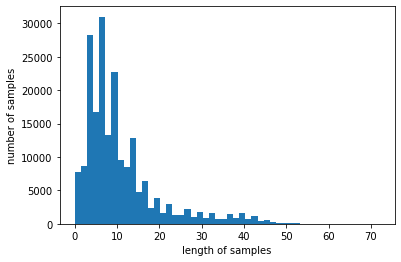

In [11]:
## 
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
    
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape
print(model.wv.most_similar("최민식"))
print(model.wv.most_similar("히어로"))


(16477, 100)

## 11.6 한국어 Word2Vec 만들기 - 위키피디아
- https://wikidocs.net/50739

## 11.7 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개
- 구글이 제공하는 사전 훈련된(미리 학습되어져 있는) Word2Vec 모델
    - https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
- 미리 학습된 Word2Vec 모델은 박규병님의 깃허브 주소
    - https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view